In [12]:
import pandas as pd
from dateutil.parser import parse
from datetime import date
from matplotlib import pyplot as plt

In [13]:
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure, save
from bokeh.models import BoxAnnotation, Span, HoverTool

output_notebook()

Loading BokehJS ...

In [14]:
df = pd.read_csv('../data/parsed/cases.csv', parse_dates=['date'])

In [15]:
df = df[df['region']=='Statewide'].copy()

In [16]:
df.tail(10)

,date,cases,recoveries,deaths,hospitalizations,region,active_cases
144,2020-07-25,183,14,0,4,Statewide,1597
145,2020-07-26,93,11,2,1,Statewide,1677
146,2020-07-27,105,17,0,2,Statewide,1765
147,2020-07-28,64,9,0,1,Statewide,1820
148,2020-07-29,79,15,1,1,Statewide,1883
149,2020-07-30,106,2,2,0,Statewide,1985
150,2020-07-31,146,5,0,1,Statewide,2126
151,2020-08-01,143,2,0,0,Statewide,2267
152,2020-08-02,59,1,1,1,Statewide,2324
153,2020-08-03,58,0,0,0,Statewide,2382


In [17]:
df['hospitalizations_5'] = df['hospitalizations'].shift(-5)
df['hospitalizations_6'] = df['hospitalizations'].shift(-6)
df['hospitalizations_7'] = df['hospitalizations'].shift(-7)
df['hospitalizations_8'] = df['hospitalizations'].shift(-8)
df['hospitalizations_9'] = df['hospitalizations'].shift(-9)
df['hospitalizations_10'] = df['hospitalizations'].shift(-10)
df['hospitalizations_11'] = df['hospitalizations'].shift(-11)
df['hospitalizations_12'] = df['hospitalizations'].shift(-12)
df['hospitalizations_13'] = df['hospitalizations'].shift(-13)
df['hospitalizations_14'] = df['hospitalizations'].shift(-14)
df['hospitalizations_15'] = df['hospitalizations'].shift(-15)
df['hospitalizations_16'] = df['hospitalizations'].shift(-16)

In [18]:
df.corr()['cases']

cases                  1.000000
recoveries             0.386820
deaths                 0.184510
hospitalizations       0.395459
active_cases           0.892853
hospitalizations_5     0.295505
hospitalizations_6     0.309082
hospitalizations_7     0.319770
hospitalizations_8     0.333557
hospitalizations_9     0.306337
hospitalizations_10    0.392699
hospitalizations_11    0.384176
hospitalizations_12    0.373356
hospitalizations_13    0.340093
hospitalizations_14    0.347088
hospitalizations_15    0.332742
hospitalizations_16    0.313236
Name: cases, dtype: float64

In [19]:
df['smoothed'] = df['hospitalizations'].rolling(7,
        win_type='gaussian',
        min_periods=3,
        center=True).mean(std=3).round()

In [20]:
p1 = figure(x_axis_type='datetime', title='Statewide Hospitalizations', aspect_ratio=1.75)
# p1.xaxis.axis_label = 'Date'
# p1.yaxis.axis_label = 'Daily Total'
p1.circle('date', 'hospitalizations', color='gray', alpha=0.7, source=df)

p1.line('date', 'smoothed', color='blue', alpha=0.8, source=df)

# Indicate the stay-at-home duration
p1.add_layout(BoxAnnotation(left=parse('16 MAR 2020'), 
                            right=parse('27 APR 2020'), 
                            fill_color='red', 
                            fill_alpha=0.025))

# Indicate the mask mandate duration
p1.add_layout(BoxAnnotation(left=parse('29 JUN 2020'), 
                            right=date.today(), 
                            fill_color='orange', 
                            fill_alpha=0.05))

# add Memorial Day Weekend start
p1.add_layout(Span(location=parse('22 MAY 2020'),
                          dimension='height', line_color='black',
                          line_dash='dashed', line_width=1))

# add Summer Solistce (only in Alaska...)
p1.add_layout(Span(location=parse('20 JUN 2020'),
                          dimension='height', line_color='black',
                          line_dash='dashed', line_width=1))

# add Independence Day Weekend
p1.add_layout(Span(location=parse('3 JUL 2020'),
                          dimension='height', line_color='black',
                          line_dash='dashed', line_width=1))

p1.add_tools(HoverTool(
    tooltips=[
        ('date', '@{date}{%F}'),
        ('cases', '@cases'), # use @{ } for field names with spaces
        ('smoothed', '@smoothed'),
        ('hospitalizations', '@hospitalizations'),
    ],
    formatters={
        '@{date}': 'datetime'
    },
))

# show(p1)
# output_file('../plots/Statewide Hospitalizations.html', mode='inline')
# save(p1)

In [21]:
df.tail()

,date,cases,recoveries,deaths,hospitalizations,region,active_cases,hospitalizations_5,hospitalizations_6,hospitalizations_7,hospitalizations_8,hospitalizations_9,hospitalizations_10,hospitalizations_11,hospitalizations_12,hospitalizations_13,hospitalizations_14,hospitalizations_15,hospitalizations_16,smoothed
149,2020-07-30,106,2,2,0,Statewide,1985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
150,2020-07-31,146,5,0,1,Statewide,2126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
151,2020-08-01,143,2,0,0,Statewide,2267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
152,2020-08-02,59,1,1,1,Statewide,2324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
153,2020-08-03,58,0,0,0,Statewide,2382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


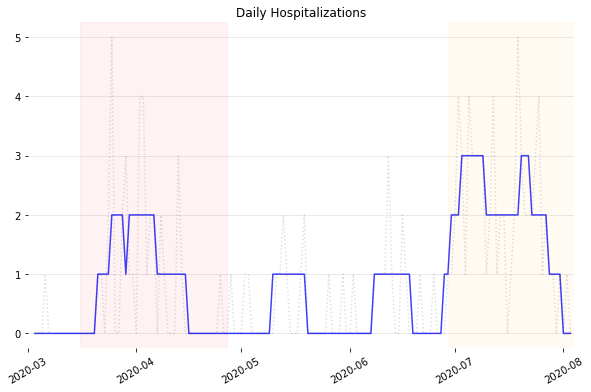

In [22]:
fig, ax = plt.subplots(figsize=(600/72,400/72))
ax.set_title('Daily Hospitalizations')
ax.plot(df['date'], df['hospitalizations'], c='gray', linestyle=':', zorder=1, alpha=.25)
ax.plot(df['date'], df['smoothed'], c='blue', linestyle='-', zorder=1, alpha=.75)

ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.autofmt_xdate(ha='center', )

x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,y1,y2))

ax.grid(which='major', axis='y', c='k', alpha=.1, zorder=-2)

ax.axvspan(parse('16 MAR 2020'), parse('27 APR 2020'), alpha=0.05, color='red') # safer at home order
ax.axvspan(parse('29 JUN 2020'), date.today(), alpha=0.05, color='orange') # mask mandate

fig.set_facecolor('w')

ax.set_xlim(pd.Timestamp('2020-03-01'), date.today())
fig.tight_layout()

In [23]:
df['smoothed_deaths'] = df['deaths'].rolling(7,
        win_type='gaussian',
        min_periods=3,
        center=True).mean(std=3).round()

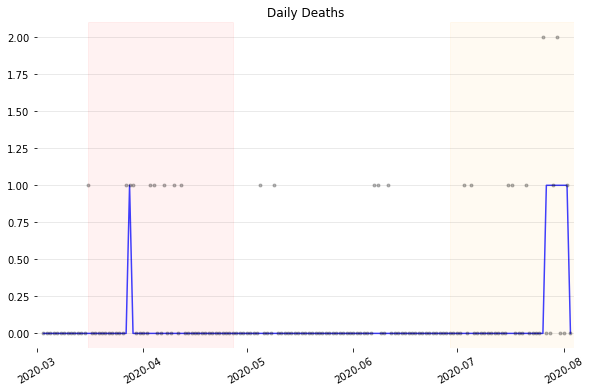

In [30]:
fig, ax = plt.subplots(figsize=(600/72,400/72))
ax.set_title('Daily Deaths')
ax.plot(df['date'], df['deaths'], 'k.', alpha=.25)
ax.plot(df['date'], df['smoothed_deaths'], c='blue', linestyle='-', zorder=1, alpha=.75)

ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.autofmt_xdate(ha='center', )

x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,y1,y2))

ax.grid(which='major', axis='y', c='k', alpha=.1, zorder=-2)

ax.axvspan(parse('16 MAR 2020'), parse('27 APR 2020'), alpha=0.05, color='red') # safer at home order
ax.axvspan(parse('29 JUN 2020'), date.today(), alpha=0.05, color='orange') # mask mandate

fig.set_facecolor('w')

ax.set_xlim(pd.Timestamp('2020-03-01'), date.today())
fig.tight_layout()